In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function


In [ ]:
# 8 variables: 
#
# MPG (miles per gallon), 
# cylinders, 
# engine displacement (cu. inches), 
# horsepower,
# vehicle weight (lbs.), 
# time to accelerate from O to 60 mph (sec.),
# model year (modulo 100), and 
# origin of car (1. American, 2. European,3. Japanese).
#
# Also provided are the car labels (types) 
# Missing data values are marked by series of question marks.


In [2]:
data=pd.read_csv('auto-mpg.csv')
data=data.drop('car name',axis=1)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [3]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [4]:
Isdigit_horsepower=data[data['horsepower'].str.isdigit()==False]
Isdigit_horsepower

#Isdigit_horsepower['horsepower']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [5]:
data=data.replace('?',np.nan)
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [6]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [7]:
data.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [8]:
data.mean()

C:\Users\hho1\AppData\Local\Temp\ipykernel_26804\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


mpg               23.514573
cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model year        76.010050
origin             1.572864
dtype: float64

In [9]:
data.horsepower.median()

93.5

In [10]:
data['horsepower']=data['horsepower'].fillna(data.horsepower.median())

In [11]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [12]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
data['horsepower']=data['horsepower'].astype(int)

In [14]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.296482,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.224809,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [16]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [17]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [18]:
data['origin']=data['origin'].map({1:'america', 2:'europe', 3:'asia'})

In [19]:
data['origin'].value_counts()

america    249
asia        79
europe      70
Name: origin, dtype: int64

In [20]:
data=pd.get_dummies(data,columns=['origin'])
data



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [21]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [22]:
x=data.drop(['mpg'],axis=1)

In [23]:
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,8,307.0,130,3504,12.0,70,1,0,0
1,8,350.0,165,3693,11.5,70,1,0,0
2,8,318.0,150,3436,11.0,70,1,0,0
3,8,304.0,150,3433,12.0,70,1,0,0
4,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1,0,0
394,4,97.0,52,2130,24.6,82,0,0,1
395,4,135.0,84,2295,11.6,82,1,0,0
396,4,120.0,79,2625,18.6,82,1,0,0


In [24]:
y=data['mpg']

In [25]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.2)

In [28]:
x_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
303,4,85.0,65,2020,19.2,79,0,1,0
347,4,85.0,65,1975,19.4,81,0,1,0
149,4,120.0,97,2489,15.0,74,0,1,0
100,6,250.0,88,3021,16.5,73,1,0,0
175,4,90.0,70,1937,14.0,75,0,0,1
...,...,...,...,...,...,...,...,...,...
369,4,112.0,88,2395,18.0,82,1,0,0
320,4,119.0,92,2434,15.0,80,0,1,0
15,6,198.0,95,2833,15.5,70,1,0,0
125,6,198.0,95,3102,16.5,74,1,0,0


In [29]:
x_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
331,4,97.0,67,2145,18.0,80,0,1,0
111,3,70.0,90,2124,13.5,73,0,1,0
350,4,105.0,63,2215,14.9,81,1,0,0
205,4,97.0,75,2155,16.4,76,0,1,0
56,4,91.0,70,1955,20.5,71,1,0,0
...,...,...,...,...,...,...,...,...,...
304,4,91.0,69,2130,14.7,79,0,0,1
187,8,305.0,140,4215,13.0,76,1,0,0
166,8,302.0,129,3169,12.0,75,1,0,0
64,8,318.0,150,4135,13.5,72,1,0,0


In [30]:
regression_model=LinearRegression()

In [31]:
regression_model.fit(x_train,y_train)

LinearRegression()

In [32]:
regression_model.coef_

array([-0.40611803,  0.02446108, -0.01532656, -0.00707244,  0.098788  ,
        0.79386262, -1.91517502,  1.0112444 ,  0.90393062])

In [33]:
regression_model.intercept_

-17.306012883598964

In [34]:
regression_model.predict(x_test)

array([33.54341048, 27.08350522, 30.86653485, 30.01656225, 24.87021525,
       36.16720479, 25.69919821, 17.36969054, 29.27283591, 26.0384934 ,
       24.4412501 , 28.53441729, 36.03019636, 26.67009642, 20.15484594,
       26.87546272, 21.59103482, 13.01098366,  8.69267783, 29.41261836,
       17.55902996, 10.05141244, 35.10919473, 23.51646745, 27.16314611,
       22.34555636, 26.00408859, 23.18396874, 29.80712361, 29.24790312,
       14.15028122, 10.92941866, 29.87173494,  8.07730514, 34.86737843,
       26.7246795 , 34.88331085, 16.78164723, 20.69548598, 11.56710594,
       29.06054956, 31.75363563, 14.99121642, 17.12568983, 30.91936901,
       30.65664829, 21.20025674, 16.14657791, 29.00036306, 14.92473174,
       19.74544047, 20.95715032, 27.43344843, 19.47140898, 36.01244995,
       33.54602437, 23.14725614, 13.61496272, 32.38136223, 27.05926139,
       23.86536263, 24.57170178, 35.06810472, 16.49410704, 32.2058785 ,
       21.02696112, 21.90090951, 19.51619646, 13.53406721, 24.37

In [35]:
y_test

331    33.8
111    18.0
350    34.7
205    28.0
56     26.0
       ... 
304    37.3
187    17.5
166    13.0
64     15.0
27     11.0
Name: mpg, Length: 80, dtype: float64

In [36]:
regression_model.score(x_train,y_train)

0.8307789225819249

In [37]:
regression_model.score(x_test,y_test)

0.7968308142656858

In [38]:
y_pred=regression_model.predict(x)


In [39]:
y_pred

array([15.02096994, 14.15028122, 15.36564861, 15.14319879, 14.98620119,
       10.84580576, 10.92941866, 10.91124488, 10.47389155, 13.33882302,
       15.65209956, 14.23063032, 14.92473174, 19.94389123, 23.66520947,
       18.79474429, 19.20582631, 20.7861468 , 25.04325504, 28.25875533,
       21.7323624 , 23.02816639, 23.56349864, 24.20673317, 20.15484594,
        7.35474242,  8.07730514,  8.00249475,  5.93917654, 25.83711766,
       23.08295244, 25.37871572, 23.89715763, 21.50409681, 15.80989071,
       17.27601919, 17.65089389, 17.12568983, 11.34415783, 10.56107962,
       12.08970399, 11.68927559,  6.59603944,  8.69267783,  5.82950291,
       19.71645237, 22.68615698, 17.55902996, 18.70491392, 22.86696465,
       26.16402441, 26.45537932, 26.15328163, 28.52304826, 29.51900578,
       28.69693649, 24.87021525, 25.96713825, 24.11466369, 27.05687892,
       23.25353544, 23.86536263, 11.67831173, 11.96305915, 12.25670698,
       13.01098366, 14.99121642, 10.31390033, 10.36724262, 10.61

In [40]:
df_y=pd.DataFrame(y)
df_y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [41]:
df_y_pred=pd.DataFrame(y_pred,columns=['mpg_pred'])

In [42]:
df_y_pred

,mpg_pred
0,15.020970
1,14.150281
2,15.365649
3,15.143199
4,14.986201
...,...
393,28.166522
394,36.011808
395,31.180576
396,29.247903


In [43]:
df_concat=pd.concat([df_y,df_y_pred],axis=1)

In [44]:
df_concat

,mpg,mpg_pred
0,18.0,15.020970
1,15.0,14.150281
2,18.0,15.365649
3,16.0,15.143199
4,17.0,14.986201
...,...,...
393,27.0,28.166522
394,44.0,36.011808
395,32.0,31.180576
396,28.0,29.247903


In [45]:
from sklearn import metrics

In [46]:
MAE=metrics.mean_absolute_error(y,y_pred)
MAE

2.528344340725301

In [47]:
RMSE=np.sqrt(MAE)
RMSE

1.5900768348495933

In [48]:
df_concat

,mpg,mpg_pred
0,18.0,15.020970
1,15.0,14.150281
2,18.0,15.365649
3,16.0,15.143199
4,17.0,14.986201
...,...,...
393,27.0,28.166522
394,44.0,36.011808
395,32.0,31.180576
396,28.0,29.247903


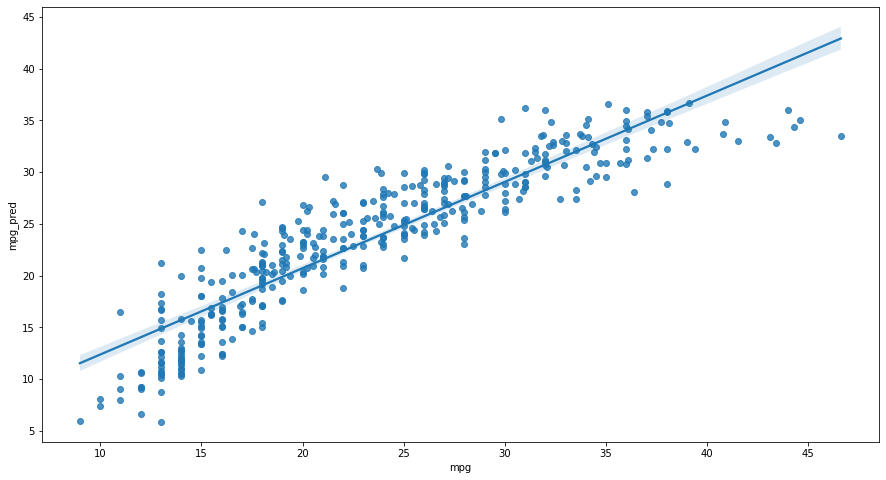

In [51]:
plt.figure(figsize=(15,8))
sns.regplot(x='mpg',y='mpg_pred',data=df_concat);

In [52]:
data_chart=data.iloc[:,0:7]

In [53]:
data_chart

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82
394,44.0,4,97.0,52,2130,24.6,82
395,32.0,4,135.0,84,2295,11.6,82
396,28.0,4,120.0,79,2625,18.6,82


<Figure size 720x720 with 0 Axes>

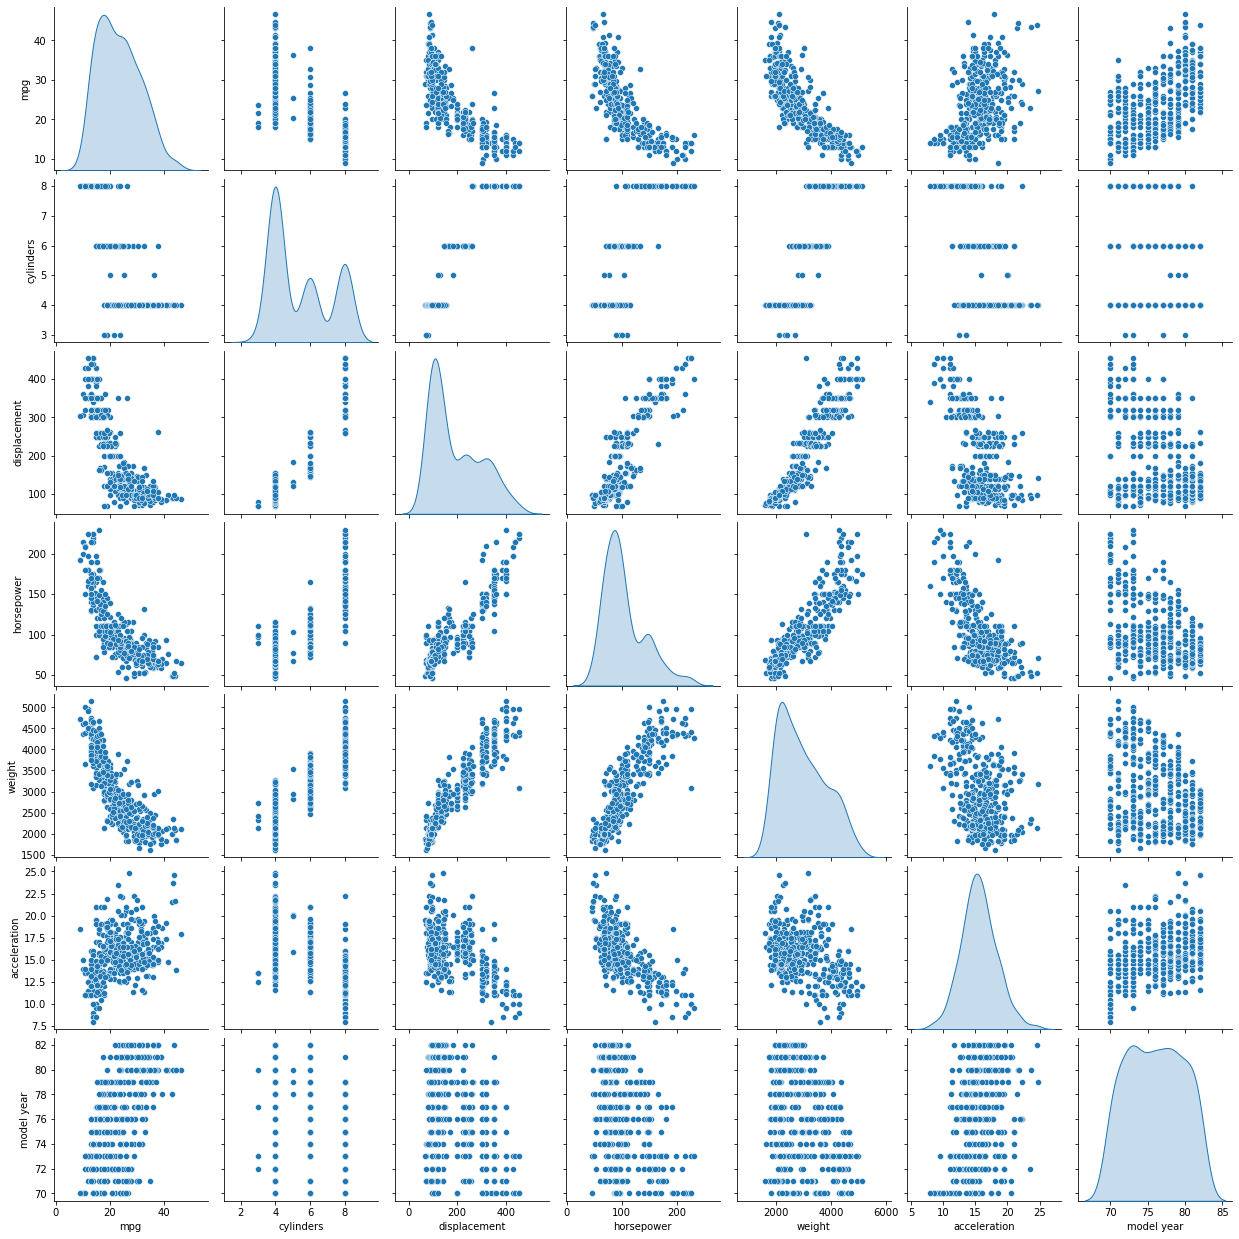

In [58]:
plt.figure(figsize=(10,10))
sns.pairplot(data_chart, diag_kind='kde')
plt.show()

In [292]:
regression_model.coef_

array([-0.40611803,  0.02446108, -0.01532656, -0.00707244,  0.098788  ,
        0.79386262, -1.91517502,  1.0112444 ,  0.90393062])

In [293]:
regression_model.intercept_

-17.306012883598964

In [295]:
x_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin_america', 'origin_asia', 'origin_europe'],
      dtype='object')

In [297]:
for x,y in enumerate (regression_model.coef_):
    print('the coefficient of {} is {}'.format(x_train.columns[x],regression_model.coef_[x]))

the coefficient of cylinders is -0.40611802730947866
the coefficient of displacement is 0.024461082323006738
the coefficient of horsepower is -0.015326564170981855
the coefficient of weight is -0.007072441884701037
the coefficient of acceleration is 0.09878800313283438
the coefficient of model year is 0.7938626208856031
the coefficient of origin_america is -1.9151750208316607
the coefficient of origin_asia is 1.011244397814621
the coefficient of origin_europe is 0.9039306230170389


In [302]:
for x in range(len(regression_model.coef_)):
    print('the coefficient of {} is {}'.format(x_train.columns[x],regression_model.coef_[x]))

the coefficient of cylinders is -0.40611802730947866
the coefficient of displacement is 0.024461082323006738
the coefficient of horsepower is -0.015326564170981855
the coefficient of weight is -0.007072441884701037
the coefficient of acceleration is 0.09878800313283438
the coefficient of model year is 0.7938626208856031
the coefficient of origin_america is -1.9151750208316607
the coefficient of origin_asia is 1.011244397814621
the coefficient of origin_europe is 0.9039306230170389


In [306]:
for x,y in enumerate (x_train.columns):
    print('the coefficient of {} is {}'.format(y,regression_model.coef_[x]))

the coefficient of cylinders is -0.40611802730947866
the coefficient of displacement is 0.024461082323006738
the coefficient of horsepower is -0.015326564170981855
the coefficient of weight is -0.007072441884701037
the coefficient of acceleration is 0.09878800313283438
the coefficient of model year is 0.7938626208856031
the coefficient of origin_america is -1.9151750208316607
the coefficient of origin_asia is 1.011244397814621
the coefficient of origin_europe is 0.9039306230170389


In [305]:
x_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin_america', 'origin_asia', 'origin_europe'],
      dtype='object')